## Planetary Gravity Modelling exercise 
This Jupyter Notebook can be used to calculate different components of a gravity field model using the spherical harmonics representation. We will take a look at the different sensitivities of the components, at different heights, and bandpass truncations to assess what the best gravity components is for your study. To handle the data in this tutorial, we use an open source python package SHtools (https://shtools.github.io/SHTOOLS/index.html). 

## Input data & Usage
The configuration is done via the configuration file, which can be defined in the Notebook itself. If you want to save your properties, the file will also be written to disk and can be saved with the output data. 

- Descriptions of datasets in SHTOOLS can be found: https://shtools.github.io/SHTOOLS/python-datasets-constants.html#earth
- Gravity models for Earth can be dowloaded from eq. http://icgem.gfz-potsdam.de/tom_longtime
- Topography map (using EARTH2012, and you will construct this yourself in the notebook, fig6)

Other datasets to compare with are

- Geological maps of the area (Earth https://mrdata.usgs.gov/geology/state/)
- Map of seismic Moho depth (Earth https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018JB016593)
- Seismic tomography (Earth https://schaeffer.ca/tomography/sl2013sv/)


## Extra info

Nice website that explains different colormaps used in python: https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

## Summary Exercises 

1. Visualise potential, geoid, gravity vector and gravity gradient components (tensor) of the topographic reduced gravity field.
    a. Discuss with a partner the differences between the components 
    b. Discuss correlations of the gravity field with the geological map, Moho depth map and seismic tomography
2. Plot the gravity vector and gradients at satellite height
    a. Perform similar comparison
    b. Discuss the differences

Question 1: which component is most suitable to study crustal structures, which component is most suitable for mantle structures?

Another way to decouple mass sources in the gravity field is by spectral filtering (SH truncation)

3. Plot the gravity field for different spherical harmonic bands
    a. 2-359
    b. 2-90
    c. 5-359
    d. 10-359
    e. 5-90
    f. 10-90
    g. 90-359
    h. Perform similar calculations for gravity gradients.
    i. Discuss correlations with maps

## Optional:

If time allows it, you can play around with some other sensitivity kernels ans see if you will change your mind about the best grvaity component to use. A good way to better understand the usefulness of different components is to inspect the sensitivity to mass sources. A good article on this is "Mass-density Green's functions for the gravitational gradient tensor at different heights" by Zdenek Martinec (GJI, 2014).

4. Sensitivity Kernels (by Martinec) are a great way to visualise the sensitivity of different components.
   a. plot spatial greens function of vector
   b. plot spatial and depth sensitivity of gradient components
   c. compare sensitivity at sea level and sat height
   d. compare crustal, lithosphere and sub lithosphere structures
   
Question 2: Revisit your answer to Question 1 

5. compute gradient maps of different representations
    a. invariance
    b. eigen vector
    c. linked to sensitivity kernels


# Data acquisition

First we need to extract the data and plot the resulting fields that we are going to use. A common format in which gravity field models are presented is using spherical harmonics. This is a mathematical representation to distribute a gravity field model in a concise way. It is based on the following equation:

$$V(r,\phi,\lambda) = \frac{GM}{R} \sum_{n=0}^{\infty} \Big(\frac{R}{r} \Big)^{n+1} \sum_{m=0}^{n} P_{nm}(\sin(\phi)) \Big[ C_{nm} \cos(m\lambda) + S_{nm} \sin(m\lambda)\Big]$$

This relates the gravity potential (V) at a certain location ($r$, $\phi$, $\lambda$) to the spherical harmonics coefficients $C_{nm}$ and $S_{nm}$ and global parameters GM and R. With the defined associate Legendre functions ($P_{nm}$), you are able to calculate the gravity potential everywhere outside the planet. The SHTOOLS software that is used in this notebook, is able to convert the information stored in the coefficients and compute the potential field. 

The gravity field is usually also shown as the resulting acceleration felt on Earth. The gravity acceleration can be calculation from the gravity potential by the following relationship:

$$\mathbf{g} = \nabla V$$

The gravity vector ($\mathbf{g}$) is computed by taking the gradient of the potential field. Usually the vector component in the radial direction ($g_r$) is the strongest. Taking the norm of the gravity vector will get the magnitude of the observed gravity 

ESA's GOCE satellite mission did not observed the gravity accelerations directly, but measured the gravity gradients ($\mathbf{T}$) felt at satellite height (approx. 250 km height).

$$\mathbf{T} = \nabla \mathbf{g} = grad(grad U) = \Bigl( \begin{smallmatrix} 
                                                              V_{xx} & V_{xy} & V_{xz} \\
                                                              V_{yx} & V_{yy} & V_{yz} \\                                                                                       V_{zx} & V_{zy} & V_{zz}        
                                                            \end{smallmatrix} \Bigr) $$

The gravity gradients tensor are the second derivative of the gravity potential. The comprise of a tensor with nine components but because the tensor is symmetric there are only 6 independent components ($V_{xy}=V_{yx}$, etc.). 

NOTE: The difference between gravity and gravitation is subtle but need to be understood. Geodesists are picky about this. Gravitation is the force/acceleration due to other attracting mass sources (Newton's law). Gravity is what is the acceleration sensed on the surface by for example a falling mass object or a swinging pendulum. This means it is the resulting acceleration due to gravitational acceleration plus the centrifugal acceleration due to the rotation of the Earth. Usually gravity is used in literature, but be aware. Satellites measure the gravitation as the are not fixed on a rotating sphere but move in an inertial system.

### Anomalies, UNITS and conventions
Gravity observations mostly show the mass and size of Earth ($\frac{GM}{R}$, if $C_{00} = 1$) and the flattening of the Earth due to its rotation and deformability (mostly represented by $C_{20}$). To better inspect  anomalies in the gravity field that can be related to local mass variation in the subsurface, usually the normal gravity field or the gravity due to the ellipsoid plus the centrifugal force are subtracted.

In this assignment, we use the WGS84 ellipsoid to calculate the values for the (unnormalised) SH coefficients for Earth:
- C00  = 1
- C20  = -1.08262982131e-3
- C40  = 2.37091120053e-6
- C60  = -6.08346498882e-9
- C80  = 1.42681087920e-11

Can you find the different ellipsoidal representations of the other planets?

Gravity potential unit is $m^2/s^2$ and when corrected for the reference ellipsoid can be converted to geoid (m) values by dividing it by the mean magnitude of the normal gravity ($\frac{GM}{R^2}$), which is approximately 9.81 m/s$^2$. (Brun's formula) Because the resulting gravity data is small a different unit is usually used: mGal (1 mGal = $1e^{-5}$ m/s$^2$). The gravity gradient tensor components are depicted in E (Eötvös, with 1 Eötvös = $1e^{-9}$ m/s$^2$).


a =  6378137.0  m
f =  0.0033528106647474805
kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 400
GM (m3 / s2) = 398600441500000.0
r0 (m) = 6378136.3
Omega (rad / s) = 7.292115e-05
error_kind = 'formal'
header = None
header2 = None
name = 'XGM2019E'
epoch = None
kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 400
error_kind = None
header = None
header2 = None
name = 'Earth2014.ret'
units = 'm'


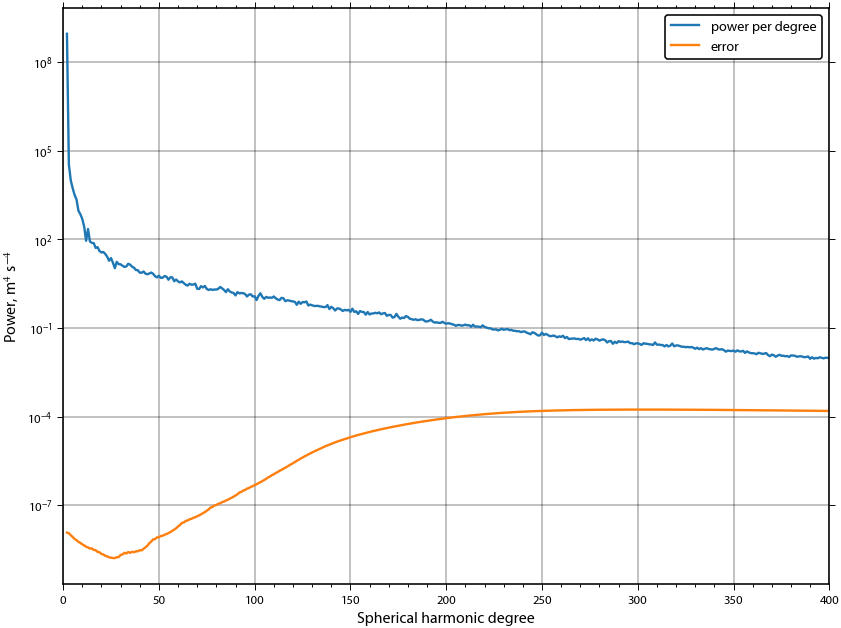

In [25]:
# -*- coding: utf-8 -*-
"""
Created on May 2021

@author: Bart Root
"""

import matplotlib.pyplot as plt
import pyshtools as pysh
from pyshtools import constants
from cartopy import crs as ccrs
import numpy as np 

pysh.utils.figstyle(rel_width=1)

################# Select your planet or other body #################
#
# Earth
# Mars
# Mercury
# Venus
# Moon
# Ceres (no Bouguer)
# Vesta (no Bouguer)

planet = 'Earth'

####################################################################

# Start of the code
if planet == 'Earth':
    # gravity and topography inputs
    clm = pysh.datasets.Earth.XGM2019E(lmax=400)
    a = constants.Earth.wgs84.a.value
    f = constants.Earth.wgs84.f.value
    u0 = constants.Earth.wgs84.u0.value
    #OO = constants.Earth.wgs84.omega.value
    #clm.set_omega(OO)
    LMAX = 400
    th_grav = 200
    shape = pysh.datasets.Earth.Earth2012.shape_ret(lmax=719)
    #topo = pysh.datasets.Earth.Earth2012.topo_bathy(lmax=719)
    topo = pysh.datasets.Earth.Earth2014.ret(lmax=400)
    th_boug = 600
    dens_boug = 2670 # Ebbing et al. 2004

elif planet == 'Mars':
    clm = pysh.datasets.Mars.GMM3(lmax=90)
    a = constants.Mars.r.value
    f = constants.Mars.f.value
    u0 = constants.Mars.u0.value
    LMAX = 400
    th_grav = 500
    # Topography
    shape = pysh.datasets.Mars.MarsTopo2600(lmax=719)
    th_boug = 800
    dens_boug = 2800 # tutorial SHTools

elif planet == 'Mercury':
    clm = pysh.datasets.Mercury.GGMES100V08()
    a = constants.Mercury.r.value
    f = 0
    LMAX = 90
    th_grav = 200
    # Topography
    shape = pysh.datasets.Mercury.GTMES150(lmax=150)
    th_boug = 300
    dens_boug = 2700 # from James 2015

elif planet == 'Venus':
    clm = pysh.datasets.Venus.MGNP180U()
    a = constants.Venus.r.value
    f = 0
    LMAX = 120
    th_grav = 200
    # Topography
    shape = pysh.datasets.Venus.VenusTopo719(lmax=719)
    th_boug = 400
    dens_boug = 2900 # from Konopliv and Sjogren 1994

elif planet == 'Moon':
    clm = pysh.datasets.Moon.GRGM900C()
    a = constants.Moon.r.value
    f = 0
    LMAX = 900
    th_grav = 800
    # Topography
    shape = pysh.datasets.Moon.MoonTopo2600p(lmax=1800)
    th_boug = 800
    dens_boug = 2500 # from Neumann et al. 2015
    
elif planet == 'Ceres':
    clm = pysh.datasets.Ceres.CERES18D()
    a = 469730
    f = 0.0469
    LMAX = 120
    th_grav = 300

elif planet == 'Vesta':
    clm = pysh.datasets.Vesta.VESTA20H()
    a = 262700
    f = 0.1204
    LMAX = 120
    th_grav = 6000
    
else:
    error('Planet type is not available!')

    
# print out values of the gravity model    
print( 'a = ', a, ' m')
print( 'f = ', f)
clm.info()
topo.info()

# plotting the the power spectrum of the data in 1D and 2D
fig1, ax1 = clm.plot_spectrum(function='potential', show=False)
#fig2, ax2 = clm.plot_spectrum2d(function='total',
#                                show=False, errors=False,
                                #cmap_limits=[10e-13, 10e-4]
                               #)
#fig3, ax3 = topo.plot_spectrum(show=False)


In [10]:
clm.to_file('Gravity_Voor_Nynke2.txt')
#shape.to_file('Topo_voor_Nynke.txt')
topo.to_file('Topo_voor_Nynke4.txt')

In [18]:
shape.info()

kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 719
error_kind = None
header = None
header2 = None
name = 'MarsTopo2600'
units = 'm'


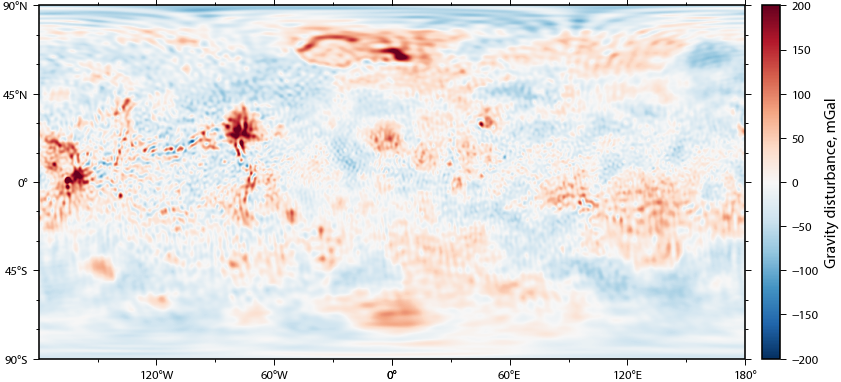

In [21]:
# gravity disturbance
PROJECTION = ccrs.PlateCarree(central_longitude=0.)

grav = clm.expand(a=a,f=f, lmax=800)
fig3, ax3 = grav.plot_total(projection=ccrs.PlateCarree(central_longitude=0.1),                            
                            tick_interval=[60, 45],
                            minor_tick_interval=[30, 15],
                            colorbar='right',
                            #cb_label='Elevation',
                            #cb_ylabel='km',
                            #cb_triangles='both',
                            cmap='RdBu_r',
                            cmap_limits=[-th_grav, th_grav],
                            show=False)

### Discussion

For Earth:
The orange line in the Fig 1 shows the error with respect to the degree coefficients. It is clear that the first 250 spherical harmonic coefficients have a low error. This is related to the global high accurate observations done by the several satellites, like GOCE. 

Around degree 760 there is an artefact in the error source. Could you discuss with you fellow students why this is?

TIP: rerun previous cell and set errors in Fig 2 plot to True (in line 18).

And for the other planets, what do the error curves tell you? Compare the different plots?

### Synthesising the spherical harmonic coefficients 
No we want to synthese the spherical harmonic coefficients into gravity field solutions and plot them in maps. One of the first questions you need to ask yourself is: "What resolution do I want for the plots?". This is related to the amount of spherical harmonic degree you use in the synthese. A useful relationship to assess the spatial resolution of your grid:

$$n_{max} = \frac{180}{\Delta x}-1$$

The maximum degree ($n_{max}$) can be related to the grid resolution ($\Delta x$) in degree. So, a 1x1 arcdeg grid field needs 179 degree spherical harmonic coefficients.

Some typical gravity plots that are common used are the free-air gravity disturbance and the geoid. The SHtools python code has build in functions that plot these fields from the loaded spherical harmonic coefficients. You do need to specify the radius ($a$) and flattening ($f$) of the reference ellipsoid that is used to correct for.

## Topographic reduction (Bouguer correction)

As the gravity field has a high correlation with topography, as can be seen by comparing Fig 3 and Fig 6, usually the gravitational signal from topography is subtracted. Classically, this is done by the Bouguer correction. It is effective because the equation is very simple:

$$\Delta g_B = 2 \pi G \rho h$$

The Bouguer correction ($\Delta g_B$) is constructed by multiplying the topographic height ($h$) with the density of the topography (usually $\rho = 2650$ kg/m$^3$), with G being the gravitational constant. However, this relationship can be derived when you assume that the topography can be modeled by an infinite stretching plate. At regions with large gradients in the curvature and for global fields in which the curvature of the planet plays a role errors do arise. Therefore, in global gravity field modelling we apply a topographic reduction that modeles the topographic mass as best as possible and forward model its gravity signal. This signal is then subtracted from the gravity field model. This is done in the following section using the topographic models inside the SHtools datasets. Ceres and Vesta, do not have any shape files present.

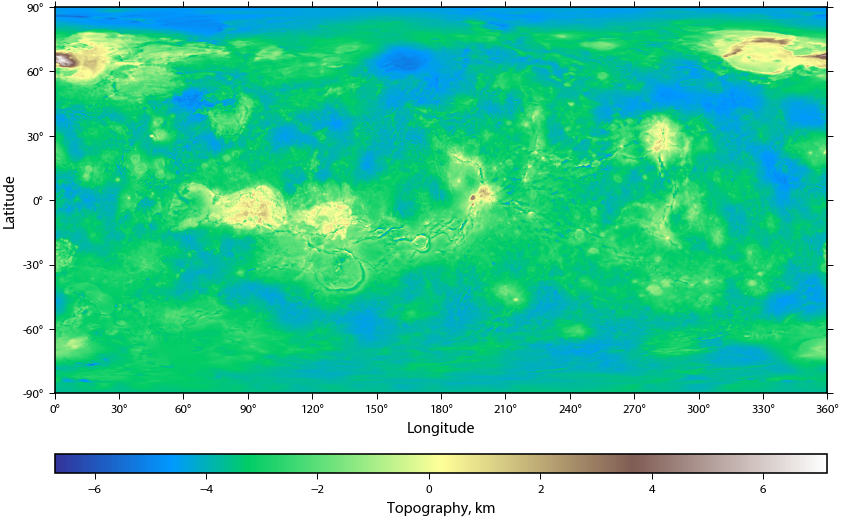

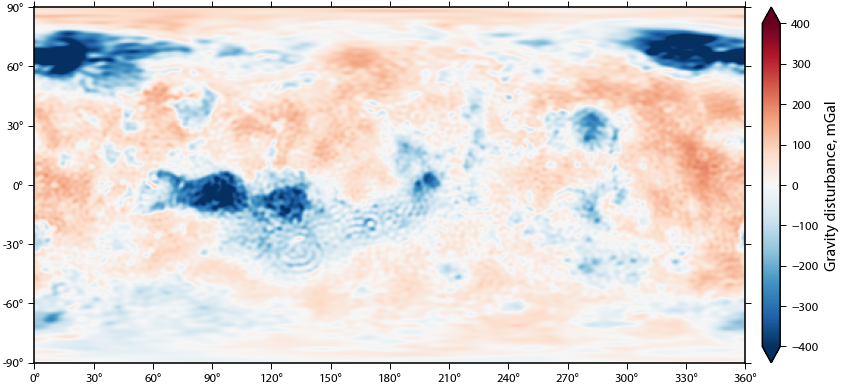

In [23]:
if planet == 'Earth' or planet == 'Mars' or planet == 'Mercury' or planet == 'Venus' or planet == 'Moon':
    # shape file plotting
    shape_grid = shape.expand(grid='DH2')
    
    topo_grid = (shape_grid) / 1.e3 - 6055
    fig6, ax6 = topo_grid.plot(colorbar='bottom',
                               cb_label='Topography, km',
                               cmap='terrain',
                               #cmap_limits=[-3, 6],
                               show=False)

    # make the Bourguer correction from the shape
    bc = pysh.SHGravCoeffs.from_shape(shape,
                                      rho=dens_boug,
                                      gm=clm.gm,
                                      lmax=LMAX)

    # set reference sphere equal to clm reference sphere
    bc = bc.change_ref(r0=clm.r0)

    bc.set_coeffs(ls=0,ms=0,values=0)
    bc.set_coeffs(ls=2,ms=0,values=0)
    #bc.set_coeffs(ls=1,ms=0,values=0)
    #bc.set_coeffs(ls=1,ms=1,values=0)
    #bc.set_coeffs(ls=1,ms=-1,values=0)

    # Construct the topogrpahic reduced gravity field (SH coefficients)
    bouguer = clm.pad(lmax=LMAX) - bc
    # Expand Coefficients into a grid

    bouguer_grid = bouguer.expand(lmax=LMAX,a=a,f=f)

    fig7, ax7 = bouguer_grid.plot_total(cmap='RdBu_r',
                                        cmap_limits=[-th_boug, th_boug], 
                                        cb_triangles='both',
                                        show=False)

### Discussion

Examine the topographic reduced field (Fig 7) with the observed gravity anomalies (Fig 3). The signal variations in the topographic reduced field are 4 times larger than the observed field. Characterised by large negative anomalies in continental regions and positive anomalies in oceanic regions. Could you discuss with your peers why this is?

Apparently, the thin topographic mass already generates more gravity field variations than observed in the total field. This mainly suggests that the Earth's topography is compensated by structures in the sub surface. It illustrates that gravity field observations give information about mass distribution of the interior of the Earth.

## Start Exercises 

### Part 1: Visualise potential, geoid, gravity vector and gravity gradient components (tensor) of the topographic reduced gravity field.
        
        a. Discuss with partner the differences between the components 
        b. Discuss correlations of the gravity field with the geological map, Moho depth map and seismic tomography
        
In this exercise, you are going to examine the properties of different components of the gravity field. You already saw that we can represent the gravity field as geoid or as gravity disturbances. Moreover, ESA's GOCE satellite observed the gravity gradient components. This different components are derivatives of each other and therefore have different sensitivity of mass sources at depth, as is related to the radial term in the gravity potential equation:

$$\Big(\frac{R}{r} \Big)^{n+1}\Big|_{potential} -  \Big(\frac{R}{r} \Big)^{n+2}\Big|_{gravity} - \Big(\frac{R}{r} \Big)^{n+3}\Big|_{gradient}$$
  
Because the fraction $\frac{R}{r}$ is always smaller than one, this term is increasingly smaller for higher degrees ($n$). At the same time, derivatives of a field enhance higher wavelength features (whereas integration smoothens a field). This results in different sensitivities for the gravity field component that is used in a geophysical study. 

This exercise is to get a feeling for this characteristic and see which component (potential/geoid, gravity. gradient) correlates with subsurface structures at different depths. 

    - Geological map (near surface/crustal structures)
    - Moho map (crustal structure)
    - Seismological tomography (mantle structures)
    
Please see links to maps and models in the first cell for your comparison.

NOTE: You could use a local region that will be used in following exercises and represents one of the most well probed region in the world: western North America. You can do this in the following Cell by uncommenting line 5 and commenting line 6.

In [4]:
##### Projection information #########

PROJECTION = ccrs.PlateCarree(central_longitude=-180.)

#roi = [50, 74, 38, 50] # local area used in later exercises
roi = [-180, 180, -90, 90] # global area

### Alternative method for calculation
Here, we show an alternative approach to calculate to correct for the normal gravity field. Instead of using the flattening of SHtools, we set the rotation of the Earth to zero (eliminating the centrifugal force) and subtracting the spherical harmonic contributions of the WGS84 ellipsoid from the topographic reduced model. This gives better results for the gravity gradient tensors components. 

In [5]:
# For the gradient plots the normal gravity needs to be subtracted from the data. 
if planet == 'Earth' or planet == 'Mars' or planet == 'Mercury' or planet == 'Venus' or planet == 'Moon':
    Vlm = bouguer.copy()
    Vlm.set_omega(0) # set the rotation to zero, to remove centrifugal accelaration
else: # For Ceres and Vesta
    Vlm = clm.copy()
    Vlm.set_omega(0) # set the rotation to zero, to remove centrifugal accelaration
    Vlm.set_coeffs(ls=0,ms=0,values=0.)
    Vlm.set_coeffs(ls=2,ms=0,values=0.)

# Set coefficients C00, C20, C40, C60, C80 such, that they are reduced by the WGS84 ellisoidal signal
# aa = Vlm.to_array()

# Vlm.set_coeffs(ls=2,ms=0,values=aa[0,2,0]+1.08262982131e-3/np.sqrt(5))
# Vlm.set_coeffs(ls=4,ms=0,values=aa[0,4,0]-2.37091120053e-6/np.sqrt(9))
# Vlm.set_coeffs(ls=6,ms=0,values=aa[0,6,0]+6.08346498882e-9/np.sqrt(13))
# Vlm.set_coeffs(ls=8,ms=0,values=aa[0,8,0]-1.42681087920e-11/np.sqrt(17))

# calulate the tensor components
gravity = Vlm.expand(lmax=LMAX, a=a) # notice the expand function does not uses f
tensor = Vlm.tensor(lmax=LMAX, a=a)

(-180.0, 180.0, -90.0, 90.0)

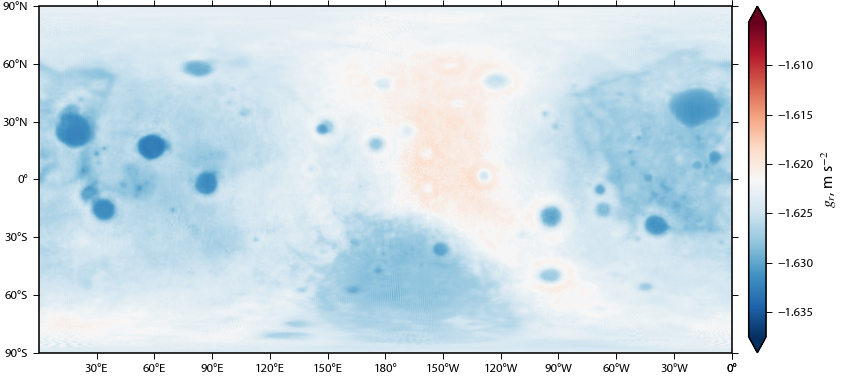

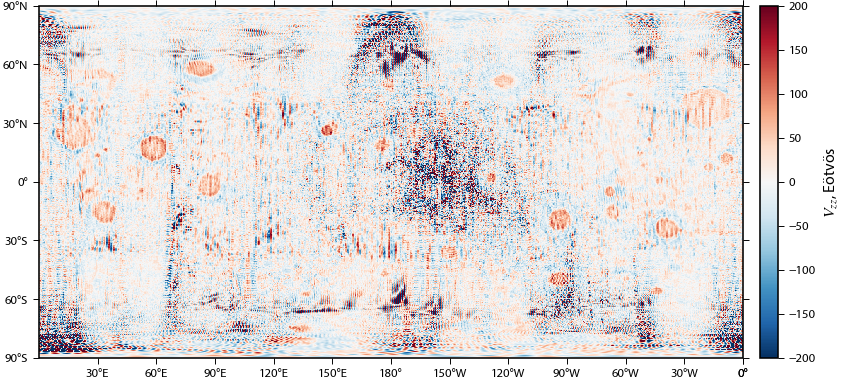

In [6]:
# plot the fields
# try out different components with:
# .plot_rad, .plot_theta, .plot_phi, .plot_pot, .plot_total
fig9, ax9 = gravity.plot_rad(projection=PROJECTION,
                             cmap='RdBu_r',
                             #cmap_limits=[-400/1e5, 400/1e5], 
                             cb_triangles='both',
                             show=False)
ax9.axis(roi)


# plot tensor components
# try out different components with:
# .plot_vxx, .plot_vyy, .plot_vzx, .plot_vzy, .plot_vxy
fig10, ax10 = tensor.plot_vzz(projection=PROJECTION,
                          cmap='RdBu_r', 
                          cmap_limits=[-200, 200], 
                          show=False)
ax10.axis(roi)

### Discussion

Question 1: which component is most suitable to study crustal structures, which component is most suitable for mantle structures?

Discuss this with your peers. Try to play with the colormaps (cmap) and colormap limits (cmap_limits) to get better results.

### Part 2: Plot the gravity vector and gradients at satellite height
- a. Perform similar comparison
- b. discuss the differences

To even better make use of this sensitivity effect and to understand the gravity field observed by satellites, you will plot the gravity field solutions at different heights.


In [ ]:
height = 250000   # is in meters (GOCE flew mostly at approximate 250 km height)

#calculate the new topographic reduced gravity anomaly at different height
gravity_satheight = Vlm.expand(lmax=LMAX, a=a+height)

fig11, ax11 = gravity_satheight.plot_rad(projection=PROJECTION,
                                         cmap='RdBu_r',
                                         #cmap_limits=[-400/1e5, 400/1e5], 
                                         cb_triangles='both',
                                         show=False)
ax11.axis(roi)

In [ ]:
# The tensor at 250 km height
tensor = Vlm.tensor(lmax=LMAX, a=a+height)

fig12, ax12 = tensor.plot_vzz(projection=PROJECTION,cmap='RdBu_r',
                              #cmap_limits=[-5, 5], 
                              show=False)
ax12.axis(roi)

### Discussion

Question 2: what height and component is more suitable to study crustal structures, which component is most suitable for mantle structures?

Discuss this with your peers. Try different heights.

### Part 3: Plot the gravity field for different spherical harmonic bands 
Now we know that the certain degrees (bands) in the spherical harmonic representation of the gravity field are sensitive to different depths in the Earth. Another common approach to decouple mass sources at different depths or to eliminate for example the deep mantle gravity signal is by spectral filtering (or spherical harmonic truncation)

In this exercise you will set different truncation limits of the spherical harmonic coefficients and examine the effect on the gravity field solution. The following band upper and lower truncations are suggested.

- a. 2-359 
- b. 2-90 
- c. 5-359 
- d. 10-359 
- e. 5-90 
- f. 10-90 
- g. 90-359 
- h. Perform similar calculations for gravity gradients. 
- i. Discuss correlations with maps

In [ ]:
# set truncation limits for coefficients
# check is LMAX > 359 for this assignment
if planet == 'Earth' or planet == 'Mars' or planet == 'Mercury' or planet == 'Venus' or planet == 'Moon':
    set_a = clm.pad(lmax=LMAX)-bc
    set_a.set_omega(0) # remove centrifugal acceleration.
else:
    set_a = clm.copy()
    set_a.set_omega(0) # remove centrifugal acceleration.
    
# minimum and maximum truncation
lmin = 20
lmax = 650
for lsh in range(0, lmin):
    for msh in range(-lsh, lsh+1):
        #print('Degree:      ', lsh)
        #print('Order: ', msh)
        set_a.set_coeffs(ls=[lsh],
                         ms=[msh],
                         values=0.)
    
# synthesize the different components.
set_a_grid = set_a.expand(lmax=lmax,a=a)
set_a_tensor = set_a.tensor(lmax=lmax,a=a)

In [ ]:
# colormap limit settings
clims = 400/1e5

# plot the different vector components
fig3_1, ax3_1 = set_a_grid.plot_rad(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims],                             
                            cb_triangles='both',
                            show=False)
ax3_1.axis(roi)

fig3_2, ax3_2 = set_a_grid.plot_theta(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims], 
                            cb_triangles='both',
                            show=False)
ax3_2.axis(roi)

fig3_3, ax3_3 = set_a_grid.plot_phi(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims], 
                            cb_triangles='both',
                            show=False)
ax3_3.axis(roi)

In [ ]:
# colormap settings
clims = 200

# plot the different gradient components
fig3_5,ax3_5 = set_a_tensor.plot_vzz(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims], 
                            cb_triangles='both',
                            show=False)
ax3_5.axis(roi)

fig3_6,ax3_6 = set_a_tensor.plot_vyy(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims], 
                            cb_triangles='both',
                            show=False)
ax3_6.axis(roi)

fig3_7,ax3_7 = set_a_tensor.plot_vxx(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims], 
                            cb_triangles='both',
                            show=False)
ax3_7.axis(roi)

In [ ]:
fig3_8,ax3_8 = set_a_tensor.plot_vzx(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims], 
                            cb_triangles='both',
                            show=False)
ax3_8.axis(roi)

fig3_9,ax3_9 = set_a_tensor.plot_vzy(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims], 
                            cb_triangles='both',
                            show=False)
ax3_9.axis(roi)

clims = 20
fig3_10,ax3_10 = set_a_tensor.plot_vxy(projection=PROJECTION,
                            cmap='RdBu_r',
                            cmap_limits=[-clims, clims], 
                            cb_triangles='both',
                            show=False)
ax3_10.axis(roi)

### Discussion

Question 3: what truncation setting is more suitable to study crustal structures, which component is most suitable for mantle structures?

Discuss this with your peers. Are they different for the gravity components than for the gravity gradient components?

## Optional

### Part 4: Sensitivity kernels are a great way to visualise the sensitivity of different components. 
Another way to observe the sensitivity of the different components is to examine the sensitivity kernels. A thorough description of the derivation of these kernels in the spherical harmonic domain can be found in the publication by Martinec 2014 (https://academic.oup.com/gji/article-abstract/196/3/1455/585621). 

In this exercise, you will plot the sensitivity kernels from Martinec (2014) to examine the properties. They might give you different insights into the sensitivity of gravity field components. Try the following exercises:

- a. plot spatial greens function of vector 
- b. plot spatial greens function of gradient   
- c. compare sensitivity at sea level and sat height 
- d. compare crustal, lithosphere and sub lithosphere structures

In [ ]:
# sensitivity of the measured gravity to certain mass sources in the subsurface.
height = 250e3    # height of the observations done (GOCE 250km)

depth = 30e3      # Depth of the mass source (crust typically 30 km, Lithospheric-mantle 100-300 km)

# radius Earth
R = 6378000
r = R+height
rd = R-depth

# angular distance between the observation and mass source
phi = np.arange(0, 15, 0.1)/180*np.pi # angular distance between computation and integration point

# caomputing parameters from Martinec (2014)
x = np.cos(phi)
t = rd/r
g = np.sqrt(1+t**2 - 2*t*x)

# Gravity vector mass-density Green's functions
Kr = -(1-t*x)/(g**3)
KO = np.sqrt(1-x**2)*(t)/(g**3)

# plot figure
plt.figure()
ax_4_1 = plt.plot(phi/np.pi*180, -Kr/np.max(-Kr), label = "Kr") 
ax_4_1 = plt.plot(phi/np.pi*180, KO/np.max(KO), label = "KO")
#plt.axis([0,15,-10,70])
plt.xlabel('Phi (degree)') 
plt.ylabel('Isotropic kernels') 
plt.title('Vector Kernel functions') 
plt.legend() 

In [ ]:
#Gravity gradient tensor mass-density Green's functions

Krr = -1/g**3 + (3*(1-t*x)**2)/(g**5)
KOO = 0.5*(1-x**2)*(3*t**2)/(g**5)
KrO = -np.sqrt(1-x**2)*(3*t*(1-t*x))/(g**5)

# plot figure
plt.figure()
ax_4_2 = plt.plot(phi/np.pi*180, Krr/np.max(Krr), label = "Krr") 
ax_4_2 = plt.plot(phi/np.pi*180, KOO/np.max(KOO), label = "KOO") 
ax_4_2 = plt.plot(phi/np.pi*180, -KrO/np.max(-KrO), label = "KrO") 
#plt.axis([0,15,-1500,30000])
plt.xlabel('Phi (degree)') 
plt.ylabel('Isotropic kernels') 
plt.title('Gradient Kernel functions') 
plt.legend()


### Discussion

Question 4: Revisit your answer to question 1, 2, and 3 with the new knowledge received from the sensitivity kernels.

If time allows an extra snippet of code that plots the radial sensitivity of the gravity gradients for different spherical harmonic degree. Just for you to play with!

In [ ]:
depth_sens = np.arange(0, 1000, 0.1)*1e3

dKv2 = (R/(R-depth_sens))**(2+2)
dKv2 = dKv2/dKv2[-1]
dKv7 = (R/(R-depth_sens))**(7+2)
dKv7 = dKv7/dKv7[-1]
dKv30 = (R/(R-depth_sens))**(30+2)
dKv30 = dKv30/dKv30[-1]
dKv90 = (R/(R-depth_sens))**(90+2)
dKv90 = dKv90/dKv90[-1]

# plot figure
plt.figure() 
ax_5_1 = plt.plot( dKv2, np.max(depth_sens/1e3)-depth_sens/1e3, label = "2") 
ax_5_1 = plt.plot( dKv7, np.max(depth_sens/1e3)-depth_sens/1e3, label = "7") 
ax_5_1 = plt.plot( dKv30, np.max(depth_sens/1e3)-depth_sens/1e3, label = "30") 
ax_5_1 = plt.plot( dKv90, np.max(depth_sens/1e3)-depth_sens/1e3, label = "90") 
#plt.axis([0,1,0,100])
plt.xlabel('Amplitude') 
plt.ylabel('Depth (km)') 
plt.title('Gradient Kernel functions') 
plt.legend()
plt.gca().invert_yaxis()

## Write your own code

5. compute gradient maps of different representations
    a. invariance
    b. eigen vector
    c. linked to sensitivity kernels
    